# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')
%qtconsole

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

<function matplotlib.pyplot.show(*args, **kw)>

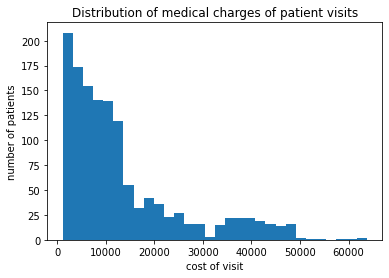

In [17]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('cost of visit')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of medical charges of patient visits')
plt.show

#Distribution NOT normal, appears to be exponential

In [13]:
dist_mean = np.mean(medical.charges)
dist_std = np.std(medical.charges, ddof=1)

print('The mean is '+ str(round(dist_mean,2)))
print('The stdev is '+str(round(dist_std,2)))
print('The median is '+str(np.median(medical.charges)))



The mean is 13270.42
The stdev is 12110.01
The median is 9382.033


The mean of this data is not entirely appropriate as it is a exponential distribution. The value will be stretched to the right due to the few outliers or higher value charges at the end.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

The mean of the given randomized sample data is $13,270, however, as mentioned above this is not entirely true based on the distribution of the data. I would use a t-score to measure the confidence interval of the mean of the data as the overall distribution and parameters of the population are not known.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

We are looking for the confidence interval of the mean (either side) so we're looking at a two tailed interval.

In [14]:
def data_sampler(n,rep=1):
    return pd.DataFrame({'sample_mean' : [np.mean(np.random.choice(medical.charges, n)) for i in range(rep)]})

df_charges = data_sampler(50,300)
df_charges.describe()

_ = plt.hist(df_charges.sample_mean, bins=30)
_ = plt.xlabel('mean cost of visit')
_ = plt.ylabel('number of samples')
_ = plt.title('Distribution of mean medical charges of random samples of 50 patient visits')
plt.show()



In [42]:
t_score = t.ppf(0.975,len(medical.charges)-1) # 1.961
se = dist_std/np.sqrt(len(medical.charges)) # 331.067

moe = t_score*se # 649.468
ci_low = dist_mean - moe
ci_hi = dist_mean + moe

In [46]:
print('The 95% confidence interval is from '+str(int(ci_low))+' to '+str(int(ci_hi)))

The 95% confidence interval is from 12620 to 13919


We are 95% certain that the actual population mean is between $12,620 and $13,919. As a result we are quite comfortable telling the staff that the average charges are above $12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Ho is that the insured and non-insured are charged the same amount. 
Ha is that the insured are charged differently from non-insured.

Unsure about the assumption on variances.

In [64]:
charges_ins = medical[medical.insuranceclaim==1].charges

charges_ins_count = len(charges_ins)
charges_ins_mean = np.mean(charges_ins)
charges_ins_std = np.std(charges_ins,ddof=1)

charges_ins.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

In [66]:
charges_none = medical[medical.insuranceclaim == 0].charges

charges_none_count = len(charges_none)
charges_none_mean = np.mean(charges_none)
charges_none_std = np.std(charges_none,ddof=1)

charges_none.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

In [73]:
sp = np.sqrt(((charges_ins_count-1)*charges_ins_std**2+(charges_none_count-1)*charges_none_std**2)/(charges_ins_count+charges_none_count-2))

t_stat = (charges_ins_mean-charges_none_mean)/(sp*np.sqrt(1/charges_ins_count+1/charges_none_count))

# Use survival function to find pvalue
p = t.sf(t_stat,charges_none_count + charges_ins_count - 2)*2 # 2 tailed test, so multiply by 2

print('The p-value for this hypothesis is '+str(p)+' therefore it is reasonable to reject the null hypothesis \n and state that insured patients are charged differently from non-insured patients')

The p-value for this hypothesis is 4.461230231620972e-31 therefore it is reasonable to reject the null hypothesis 
 and state that insured patients are charged differently from non-insured patients


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [75]:
from scipy.stats import ttest_ind
ttest_ind(charges_ins,charges_none)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

No z-test statistic. Z-test is for when a whole population is known, so why would you compare two samples when you have the whole population.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test